# K-Means Clustering

For this analysis the data is the load_iris from scikit-learn

In this analysis the objective is to group the data and classify them according to their measurements to predict what type of flower it is.

In [11]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [12]:
pd.set_option("display.max_columns",5)

In [13]:
pd.set_option("display.width", None)

In [14]:
pd.set_option("display.precision", 2)

In [15]:
sns.set(font_scale=1.1)

In [16]:
sns.set_style('whitegrid')

In [17]:
from sklearn.datasets import load_iris

In [18]:
iris = load_iris()

In [19]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [20]:
iris.data.shape

(150, 4)

In [21]:
iris.target.shape

(150,)

In [22]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [23]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Create the DF

In [24]:
iris_df=pd.DataFrame(iris.data, columns = iris.feature_names)

Add a new column to the DF with the Target information

In [25]:
iris_df['species']=[iris.target_names[i] for i in iris.target]

In [26]:
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [27]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [28]:
iris_df['species'].describe()

count        150
unique         3
top       setosa
freq          50
Name: species, dtype: object

C:\Users\don_q\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


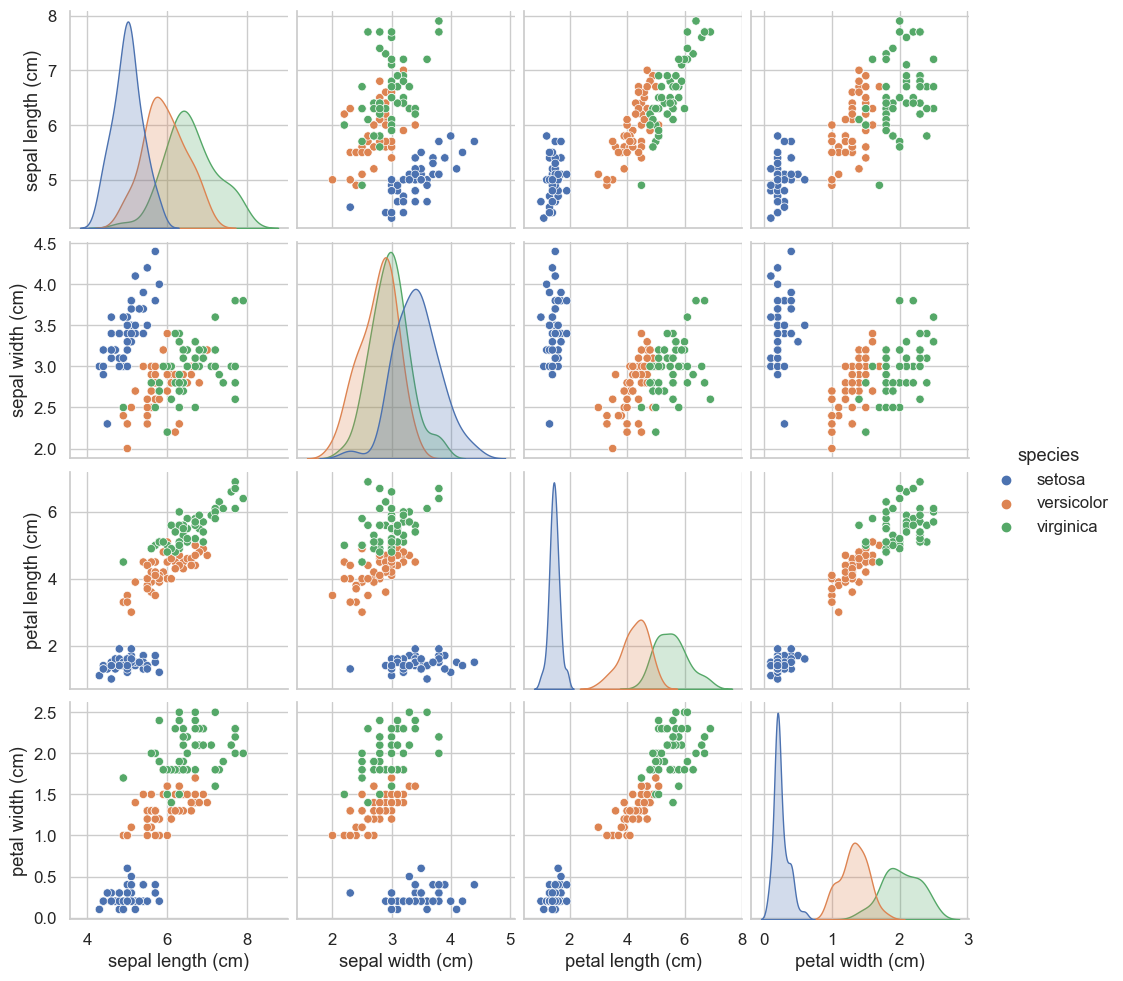

In [29]:
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4], hue="species")

use K-means to generate the estimator

In [30]:
kmeans = KMeans(n_clusters=3, random_state=11)

Training the model

In [31]:
kmeans.fit(iris.data)

C:\Users\don_q\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\don_q\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=11)

In [32]:
print(kmeans.labels_[0:50])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [33]:
print(kmeans.labels_[50:100])

[0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [34]:
print(kmeans.labels_[100:150])

[2 0 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2
 2 0 2 2 2 0 2 2 2 0 2 2 0]


# PCA

dimensionality reduction with pca to reduce the dimensions of the data 

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=2, random_state=11)

In [37]:
pca.fit(iris.data)

PCA(n_components=2, random_state=11)

In [38]:
iris_pca=pca.transform(iris.data)

In [39]:
iris_pca.shape

(150, 2)

In [40]:
iris_pca_df = pd.DataFrame(iris_pca, columns=['Component_1','Component_2'])

In [41]:
iris_pca_df['Species'] = iris_df.species

Visualize the Data in a Scatterplot

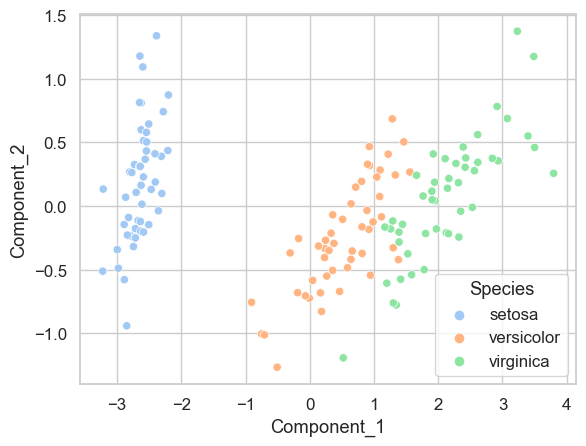

In [42]:
axes = sns.scatterplot( data=iris_pca_df, x='Component_1', y='Component_2', hue='Species', legend='brief', palette='pastel')

## Create the centroides

In [43]:
iris_centr=pca.transform(kmeans.cluster_centers_)

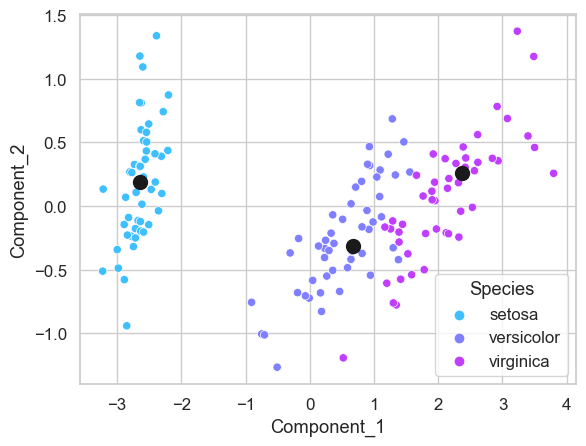

In [44]:
axes = sns.scatterplot( data=iris_pca_df, x='Component_1', y='Component_2', hue='Species', legend='brief', palette='cool')

dots = plt.scatter(iris_centr[:,0], iris_centr[:,1], s=100, c="k")

## Compare with other estimators

In [45]:
from sklearn.cluster import DBSCAN, MeanShift, SpectralClustering, AgglomerativeClustering

In [46]:
estimators = {"KMeans":kmeans, "DBSCAN":DBSCAN(), "MeanShift":MeanShift(), "SpectralClustering":SpectralClustering(n_clusters=3), "AgglomerativeClustering":AgglomerativeClustering(n_clusters=3)}

In [47]:
for name, estimator in estimators.items():
    estimator.fit(iris.data)
    print(f'\n{name}:')
    for i in range(0,101,50):
        etiquetas,cuentas = np.unique(estimator.labels_[i:i+50],return_counts=True)
        print (f'{i}-{i-50}:')
        for etiqueta, cuenta in zip(etiquetas, cuentas):
            print(f' etiqueta={etiqueta}, cuenta={cuenta}')

C:\Users\don_q\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\don_q\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



KMeans:
0--50:
 etiqueta=1, cuenta=50
50-0:
 etiqueta=0, cuenta=48
 etiqueta=2, cuenta=2
100-50:
 etiqueta=0, cuenta=14
 etiqueta=2, cuenta=36

DBSCAN:
0--50:
 etiqueta=-1, cuenta=1
 etiqueta=0, cuenta=49
50-0:
 etiqueta=-1, cuenta=6
 etiqueta=1, cuenta=44
100-50:
 etiqueta=-1, cuenta=10
 etiqueta=1, cuenta=40

MeanShift:
0--50:
 etiqueta=1, cuenta=50
50-0:
 etiqueta=0, cuenta=49
 etiqueta=1, cuenta=1
100-50:
 etiqueta=0, cuenta=50


C:\Users\don_q\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



SpectralClustering:
0--50:
 etiqueta=0, cuenta=50
50-0:
 etiqueta=1, cuenta=50
100-50:
 etiqueta=1, cuenta=15
 etiqueta=2, cuenta=35

AgglomerativeClustering:
0--50:
 etiqueta=1, cuenta=50
50-0:
 etiqueta=0, cuenta=49
 etiqueta=2, cuenta=1
100-50:
 etiqueta=0, cuenta=15
 etiqueta=2, cuenta=35


## Confusion Matrix

In [48]:
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.cluster import KMeans


Predicted labels


In [49]:
predicted_labels = kmeans.labels_

True labels

In [50]:
true_labels = iris.target

Calculate adjusted Rand index

In [51]:
ari = adjusted_rand_score(true_labels, predicted_labels)

In [53]:
print(f'Adjusted Rand Index: {ari:.2f}')

Adjusted Rand Index: 0.73


Generate a confusion matrix

In [54]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)

print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[ 0 50  0]
 [48  0  2]
 [14  0 36]]


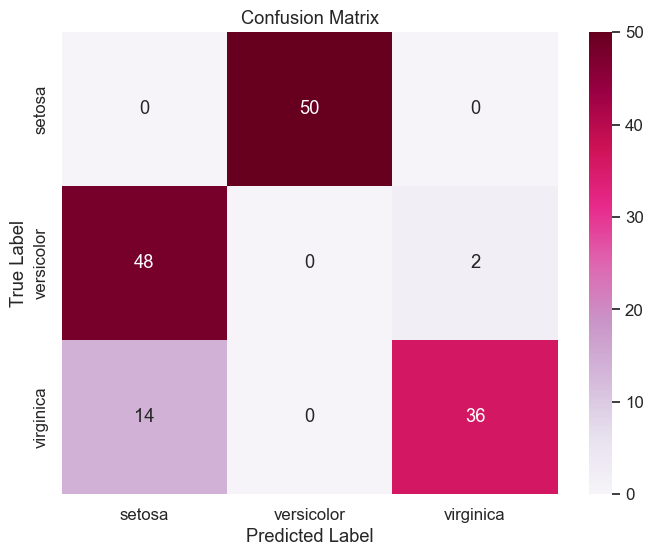

In [66]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuRd', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()